#1. Napisz program który automatycznie będzie wczytywał po koleji dane z plików daneXX.txt i wykonywał resztę zadań. Zaproponuj i zrealizuj podział tych danych na dane treningowe i dane testowe. 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/drive')
num_files = 15

def load_data_and_split(file_num):
    data = np.loadtxt("/content/drive/MyDrive/miw4/Dane/dane{}.txt".format(file_num))
    X_data = data[:, [0]]
    y_data = data[:, [1]]
    X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_data, y_data, test_size=0.3, random_state=1)
    return X_train_set, X_test_set, y_train_set, y_test_set


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Zaproponuj liniowy model parametryczny Model 1. Określ parametry modelu stosując metodę najmniejszych kwadratów dla danych treningowych,

In [ ]:
def fit_linear_model(X_train, y_train):
    lin_matrix = np.hstack([X_train, np.ones(X_train.shape)])
    lin_coefficients = np.linalg.pinv(lin_matrix) @ y_train
    return lin_coefficients

#3. Zweryfikuj poprawność Modelu 1,

In [ ]:
def calculate_error(X, y, model_coefficients, model_type='linear'):
    if model_type == 'linear':
        y_pred = model_coefficients[0] * X + model_coefficients[1]
    elif model_type == 'nonlinear':
        y_pred = model_coefficients[0] * pow(X, 5) + (-2) * model_coefficients[1] * pow(X, 2) + 1
    error = sum((y - y_pred) ** 2) / len(X)
    return error

#4. Zaproponuj bardziej złożony, minimum 3 stopnia, model regresji nieliniowej Model 2. Określ parametry modelu stosując metodę najmniejszych kwadratów dla danych treningowych,

In [ ]:
def fit_nonlinear_model(X_train, y_train):
    alt_matrix = np.hstack([pow(X_train, 5), -2 * pow(X_train, 2), np.ones(X_train.shape)])
    alt_coefficients = np.linalg.pinv(alt_matrix) @ y_train
    return alt_coefficients

#5. Zweryfikuj poprawność Modelu 2,

In [ ]:
    alt_train_error = sum((y_train_set - (alt_coefficients[0] * pow(X_train_set, 5) + (-2) * alt_coefficients[1] * pow(X_train_set, 2) + 1)) ** 2) / len(X_train_set)
    alt_test_error = sum((y_test_set - (alt_coefficients[0] * pow(X_test_set, 5) + (-2) * alt_coefficients[1] * pow(X_test_set, 2) + 1)) ** 2) / len(X_test_set)

#6. Porównaj oba modele.

Dataset: 15

Linear model: 
 [[-0.06862989]
 [ 0.39791168]]
Linear model (train): 
 [0.22594381]
Linear model (test): 
 [0.30664909]


Alternative model: 
 [[-0.00112013]
 [-0.02302509]
 [ 0.26585152]]
Alternative model (train): 
 [0.73993066]
Alternative model (test): 
 [1.09327484]




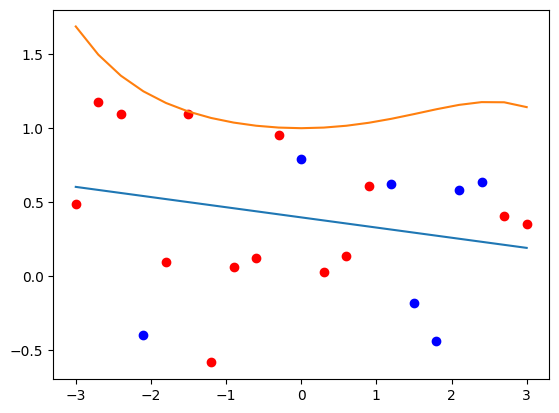

In [ ]:
import matplotlib.pyplot as plt

def plot_models(X_train, X_test, y_train, y_test, lin_coefficients, alt_coefficients):
    X_data = np.concatenate([X_train, X_test])
    lin_pred = lin_coefficients[0] * X_data + lin_coefficients[1]
    alt_pred = alt_coefficients[0] * pow(X_data, 5) + (-2) * alt_coefficients[1] * pow(X_data, 2) + 1
    
    plt.plot(X_test, y_test, 'bo', label='Test Data')
    plt.plot(X_train, y_train, 'ro', label='Train Data')
    plt.plot(X_data, lin_pred, label='Linear Model')
    plt.plot(X_data, alt_pred, label='Nonlinear Model')
    plt.legend()
    plt.show()

for i in range(num_files):
    X_train, X_test, y_train, y_test = load_data_and_split(i + 1)
    linear_coefficients = fit_linear_model(X_train, y_train)
    nonlinear_coefficients = fit_nonlinear_model(X_train, y_train)
    
    lin_train_error = calculate
